In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression


In [2]:
df_train=pd.read_csv("train_data.txt",sep=":::",header=0,engine="python")
df_test=pd.read_csv("test_data.txt",sep=":::",header=0,engine="python")
df_train.columns=['SNo','movie_name','category','confession']
df_test.columns=['SNo','movie_name','cnfession']



In [3]:
df_test.head()


,SNo,movie_name,cnfession
0,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
1,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
2,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
3,5,Er nu zhai (1955),Before he was known internationally as a mart...
4,6,Riddle Room (2016),Emily Burns is being held captive in a room w...


In [4]:
df_train.head()


,SNo,movie_name,category,confession
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...


In [5]:
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47464 entries, 0 to 47463
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SNo         47464 non-null  int64 
 1   movie_name  47464 non-null  object
 2   cnfession   47464 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [6]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44890 entries, 0 to 44889
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SNo         44890 non-null  int64 
 1   movie_name  44890 non-null  object
 2   category    44889 non-null  object
 3   confession  44889 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


In [7]:
df_train.describe()


,SNo
count,44890.000000
mean,22446.500000
std,12958.771129
min,2.000000
25%,11224.250000
50%,22446.500000
75%,33668.750000
max,44891.000000


In [8]:
df_test.describe()

,SNo
count,47464.000000
mean,23733.500000
std,13701.820925
min,2.000000
25%,11867.750000
50%,23733.500000
75%,35599.250000
max,47465.000000


In [9]:
df_test.isnull().sum()


,0
SNo,0
movie_name,0
cnfession,0


In [10]:
df_train.isnull().sum()

,0
SNo,0
movie_name,0
category,1
confession,1


In [11]:
df_train.count()

,0
SNo,44890
movie_name,44890
category,44889
confession,44889


In [12]:
df_test.count()


,0
SNo,47464
movie_name,47464
cnfession,47464


In [13]:
df_train.iloc[0:3]

,SNo,movie_name,category,confession
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...


In [14]:
df_train.iloc[0]

,0
SNo,2
movie_name,Cupid (1997)
category,thriller
confession,A brother and sister with a past incestuous r...


In [15]:
df_test.shape

(47464, 3)

In [16]:
df_train.shape

(44890, 4)

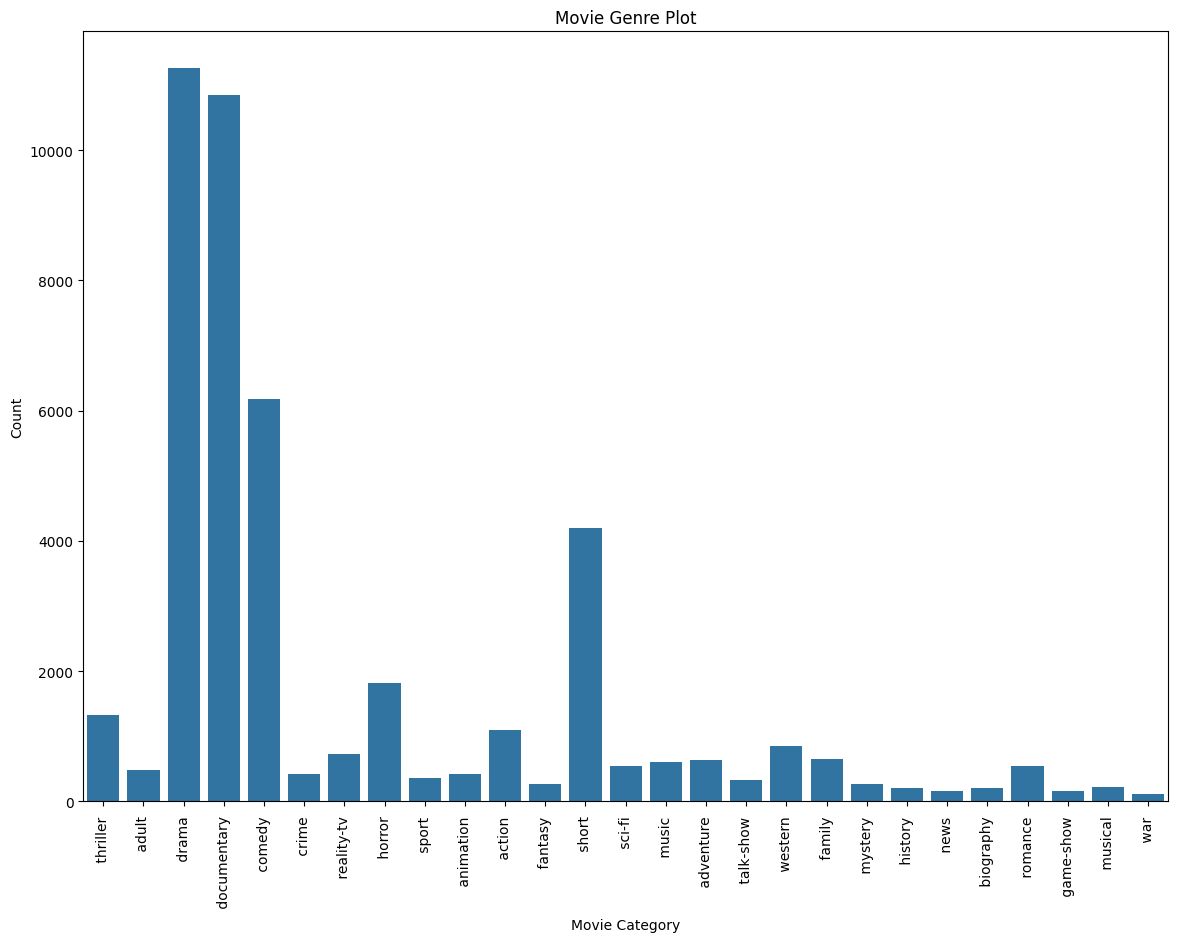

In [17]:
plt.figure(figsize=(14,10))
sns.countplot(x='category',data=df_train)
plt.xlabel('Movie Category')
plt.ylabel('Count')
plt.title('Movie Genre Plot')
plt.xticks(rotation=90)
plt.show()

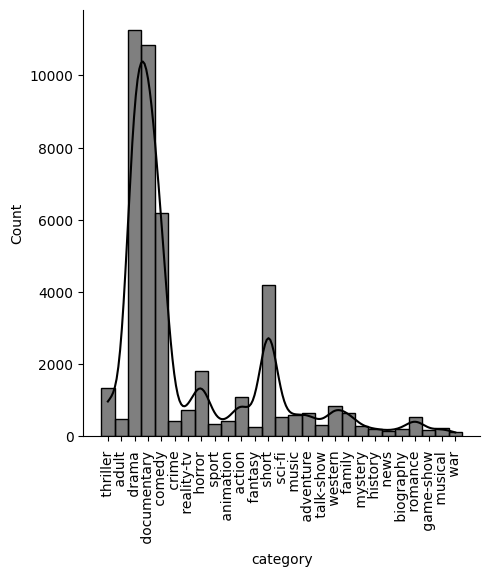

In [18]:
sns.displot(df_train.category,kde=True,color="black")
plt.xticks(rotation=90);

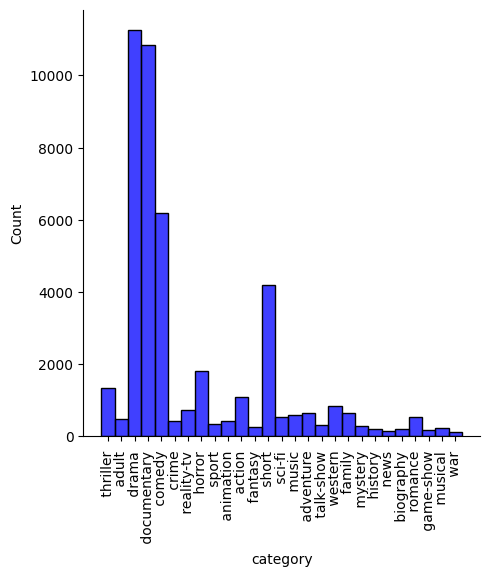

In [19]:
sns.displot(df_train.category,kde=False,color="blue")
plt.xticks(rotation=90);

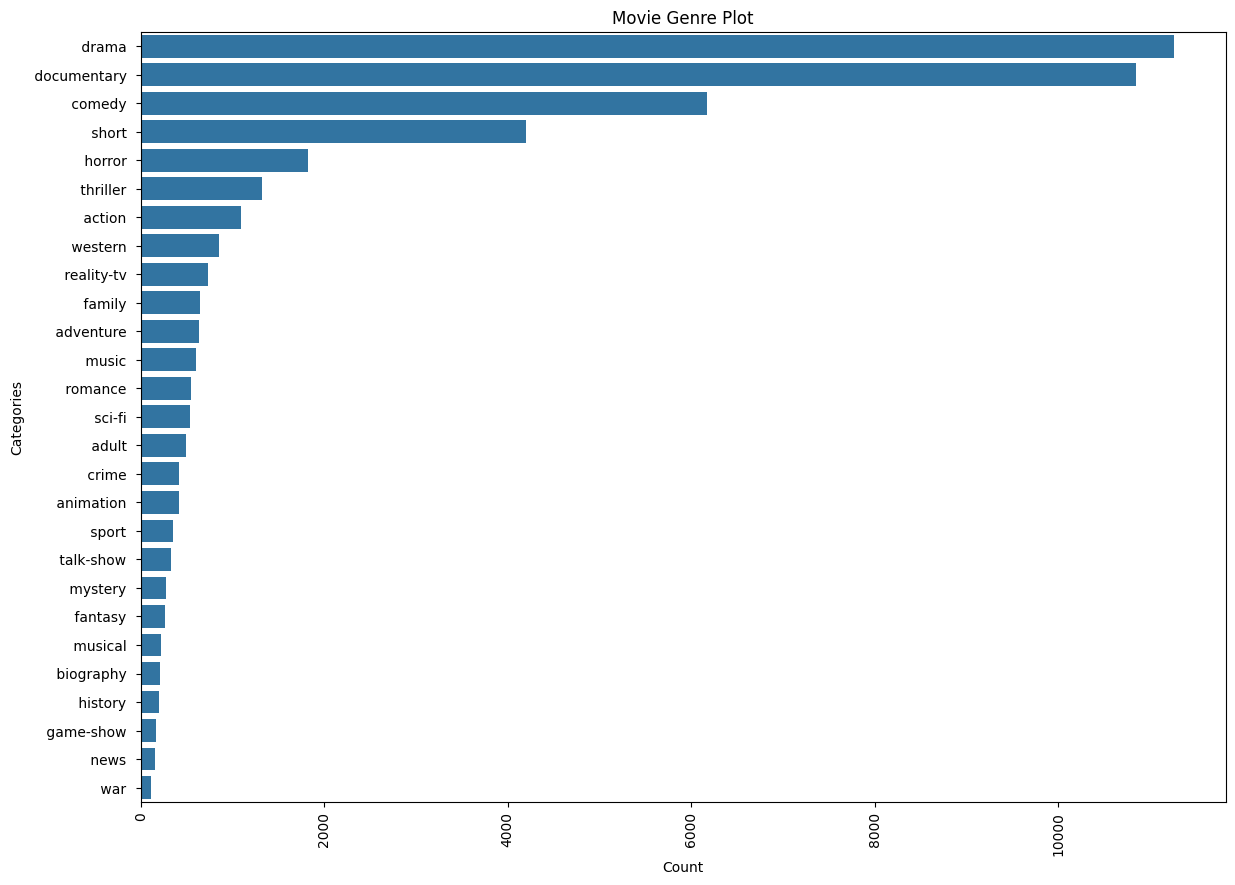

In [20]:
plt.figure(figsize=(14,10))
count1=df_train.category.value_counts()
sns.barplot(x=count1,y=count1.index,orient="h")
plt.xlabel('Count')
plt.ylabel('Categories')
plt.title('Movie Genre Plot')
plt.xticks(rotation=90)
plt.show()

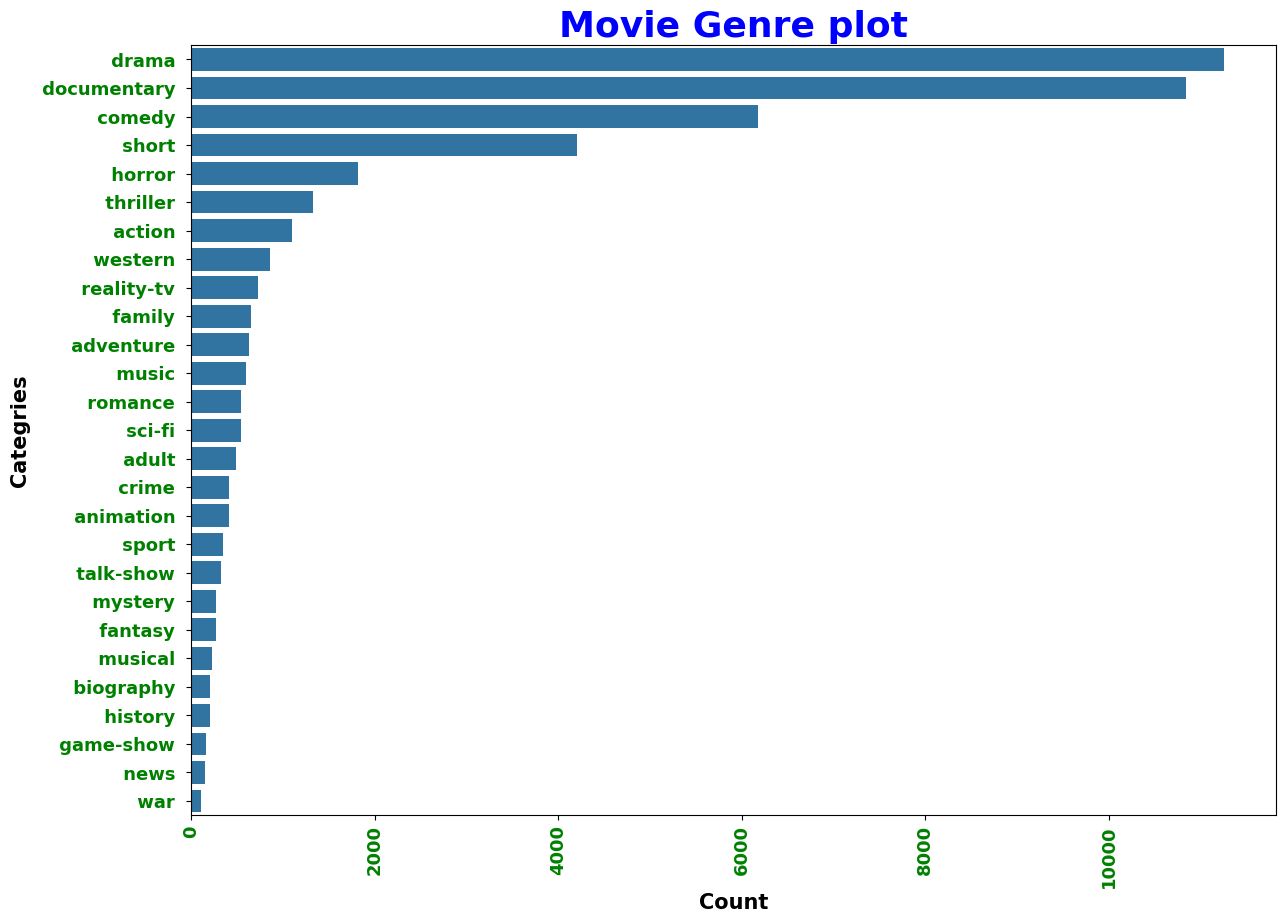

In [21]:
plt.figure(figsize=(14,10))
count1=df_train.category.value_counts()
sns.barplot(x=count1,y=count1.index,orient='h')
plt.xlabel('Count',fontsize=15,fontweight='bold')
plt.ylabel('Categries',fontsize=15,fontweight='bold')
plt.title('Movie Genre plot',fontsize=26,fontweight='bold',color='blue')
plt.xticks(rotation=90,fontsize=13,fontweight='bold',color='green')
plt.yticks(fontsize=13,fontweight='bold',color='green')
plt.show()

In [22]:
df_combined=pd.concat([df_train,df_test],axis=0)

In [23]:
df_combined.head()

,SNo,movie_name,category,confession,cnfession
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,NaN
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,NaN
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,NaN
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,NaN
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...,NaN


In [24]:
df_combined.shape

(92354, 5)

In [25]:
df_combined.size

461770

In [26]:
df_combined.isnull().any()


,0
SNo,False
movie_name,False
category,True
confession,True
cnfession,True


In [27]:
df_combined.count()


,0
SNo,92354
movie_name,92354
category,44889
confession,44889
cnfession,47464


In [28]:
encoder=LabelEncoder()
df_combined['categort']=encoder.fit_transform(df_combined['category'].values)

In [29]:
encoder=LabelEncoder()
df_combined['movie_name']=encoder.fit_transform(df_combined['movie_name'].values)


In [30]:
df_combined.head()

,SNo,movie_name,category,confession,cnfession,categort
0,2,26628,thriller,A brother and sister with a past incestuous r...,NaN,24
1,3,91593,adult,As the bus empties the students for their fie...,NaN,1
2,4,81861,drama,To help their unemployed father make ends mee...,NaN,8
3,5,83095,drama,The film's title refers not only to the un-re...,NaN,8
4,6,63475,documentary,Quality Control consists of a series of 16mm ...,NaN,7


In [31]:
df_combined.category=df_combined.category.fillna(df_combined.category.mode())


In [32]:
df_combined.count()

,0
SNo,92354
movie_name,92354
category,44890
confession,44889
cnfession,47464
categort,92354


In [33]:
df_combined.duplicated().values.any()

False

In [34]:
vectorizer=TfidfVectorizer()


In [35]:
df_combined['confession']=df_combined['confession'].fillna('')

In [36]:

df_combined['confession'] = df_combined['confession'].fillna('')
X = vectorizer.fit_transform(df_combined['confession'])

In [37]:
df_combined.head()


,SNo,movie_name,category,confession,cnfession,categort
0,2,26628,thriller,A brother and sister with a past incestuous r...,NaN,24
1,3,91593,adult,As the bus empties the students for their fie...,NaN,1
2,4,81861,drama,To help their unemployed father make ends mee...,NaN,8
3,5,83095,drama,The film's title refers not only to the un-re...,NaN,8
4,6,63475,documentary,Quality Control consists of a series of 16mm ...,NaN,7


In [38]:
print(df_combined.isnull().sum())

SNo               0
movie_name        0
category      47464
confession        0
cnfession     44890
categort          0
dtype: int64


In [39]:
df_combined.fillna(0,inplace=True)

In [40]:
y=df_combined["category"]

In [41]:
X_train,X_test,y_train,y_test=train_test_split(df_combined.drop('category',axis=1),y,test_size=0.2,random_state=42)

In [42]:
naive_bayes_model=MultinomialNB()

In [43]:
MultinomialNB()

MultinomialNB()

In [44]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


categorical_features = ['movie_name']


categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])


numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0))
])

transformer = ColumnTransformer(
    transformers=[
        ('cat', categorical_pipeline, categorical_features),
        ('num', numerical_pipeline, X_train.select_dtypes(include=['number']).columns)
    ],
    remainder='drop'
)


X_train_transformed = transformer.fit_transform(X_train)

X_test_transformed = transformer.transform(X_test)

naive_bayes_model = MultinomialNB()



In [45]:

y_train = y_train.astype(str)

label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)


In [46]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


categorical_features = ['movie_name']


categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])


numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0))
])

transformer = ColumnTransformer(
    transformers=[
        ('cat', categorical_pipeline, categorical_features),
        ('num', numerical_pipeline, X_train.select_dtypes(include=['number']).columns)
    ],
    remainder='drop'
)

X_train_transformed = transformer.fit_transform(X_train)

X_test_transformed = transformer.transform(X_test)

naive_bayes_model = MultinomialNB()

naive_bayes_model.fit(X_train_transformed, y_train_encoded)

nb_predictions = naive_bayes_model.predict(X_test_transformed)



In [47]:
y_test_encoded = label_encoder.transform(y_test.astype(str))
print("Naive Bayes Model:")
print(confusion_matrix(y_test_encoded, nb_predictions))
print(classification_report(y_test_encoded, nb_predictions))
print("Accuracy:", accuracy_score(y_test_encoded, nb_predictions))
print("r2_score:", r2_score(y_test_encoded, nb_predictions))

Naive Bayes Model:
[[   0    0    0   37    0   15    0    7    9    0    0   17    0    0
     0    0    0    0   21    0    0   16    0   12    0    0   72    7]
 [   0    0    0   16    0   10    0    2    3    0    0    1    0    0
     0    0    0    0    4    0    0   11    0   13    0    0   39    3]
 [   0    0    0   12    0   12    0    2    2    0    0   11    0    0
     0    0    0    0    9    0    0    9    0    8    0    0   55    1]
 [   0    0    0    9    0    4    0    2    0    0    0   22    0    0
     0    0    0    0    7    0    0    3    0    4    0    0   25    1]
 [   0    0    0    4    0    4    0    2    1    0    0    2    0    0
     0    0    0    0    6    0    0    1    0    2    0    0   14    3]
 [   0    0    0  170    0  104    0   25   26    0    0  183    0    0
     0    0    0    0  121    0    0   55    0   77    0    0  429   39]
 [   0    0    0   11    0   10    0    2    3    0    0   11    0    0
     0    0    0    0    6    0    0   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
logistic_regression_model=LogisticRegression()

In [49]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


categorical_features = ['movie_name']

In [50]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

logistic_regression_model = LogisticRegression()

logistic_regression_model.fit(X_train_transformed, y_train_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
LogisticRegression()

LogisticRegression()

In [52]:
logistic_regression_model.fit(X_train_transformed, y_train_encoded)

lr_predictions = logistic_regression_model.predict(X_test_transformed)

from sklearn.preprocessing import LabelEncoder


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

categorical_features = ['movie_name']
numerical_features = X_train.select_dtypes(include=['number']).columns

transformer = ColumnTransformer(
    transformers=[
        ('onehot', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features),
        ('num', SimpleImputer(strategy='mean'), numerical_features)
    ],
    remainder='passthrough'
)


In [54]:
lr_predictions = logistic_regression_model.predict(X_test_transformed)

y_test_encoded = label_encoder.transform(y_test.astype(str))

print("\nLogistic Regression Model:")
print(confusion_matrix(y_test_encoded, lr_predictions))
print(classification_report(y_test_encoded, lr_predictions))
print("Accuracy:", accuracy_score(y_test_encoded, lr_predictions))
print("r2_score:", r2_score(y_test_encoded, lr_predictions))


Logistic Regression Model:
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0  213]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0  102]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0  121]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0   77]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0   39]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0 1229]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
